# K-Neasrest Neighbors

k-Nearest Neighbors (k-NN) is a supervised machine learning algorithm used for classification and regression tasks. It's a simple and intuitive algorithm that makes predictions based on the majority class (for classification) or the mean value (for regression) of the k-nearest data points in the feature space.

So how does it work?



1.   **Data Representation:** Each data point in the dataset is represented as a point in a multi-dimensional feature space, where each feature corresponds to a different attribute or characteristic of the data.
2.   **Distance Measurement:** To find the k-nearest neighbors for a given data point, the algorithm calculates the distance between that point and every other point in the dataset. The most common distance metric is the Euclidean distance, but other metrics like Manhattan distance or cosine similarity can also be used
3.   **Neighbor Selection:** Once the distances are calculated, the k data points with the smallest distances to the target point are considered its neighbors.
4.  **Prediction:** For classification tasks, the algorithm assigns the most common class among the k-nearest neighbors to the target point. For regression tasks, the algorithm predicts the mean (or another summary statistic) of the target values of the k-nearest neighbors.
5.  **Parameter k:** The choice of the parameter k (the number of neighbors) is crucial. A small value of k may lead to noisy predictions, while a large value may smooth out important patterns in the data. The optimal value of k often depends on the specific characteristics of the dataset.
6.  **Scalability:** One important consideration with k-NN is that it can be computationally expensive, especially as the size of the dataset increases. Searching for the nearest neighbors requires comparing the target point to every other point in the dataset.



<img src= "https://miro.medium.com/v2/resize:fit:505/0*2_qzcm2gSe9l67aI.png" >

To illustrate this point, let us import the following packages, load the penguins dataset, and plot the bill length versus bill depth.

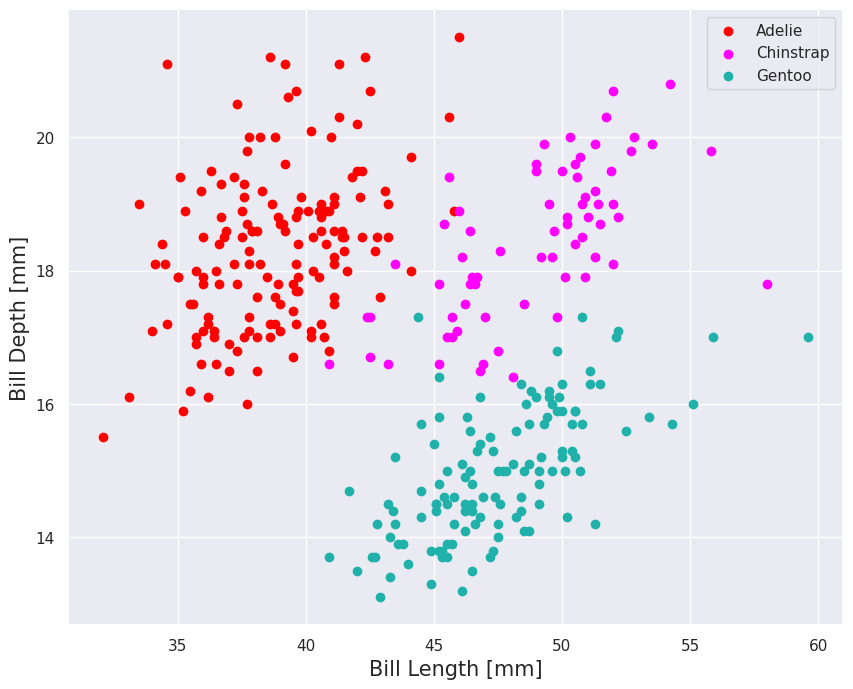

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Set theme for plotting
sns.set_theme()

# Import the "penguins" dataset
penguins = sns.load_dataset("penguins")

# Plot the data
species_list = penguins['species'].unique()
colors = ["red", "magenta", "lightseagreen"]

fig, ax = plt.subplots(figsize=(10, 8))
for species, color in zip(species_list, colors):
    temp_df = penguins[penguins['species'] == species]
    ax.scatter(temp_df['bill_length_mm'],
               temp_df['bill_depth_mm'],
               c=color,
               label=species,
               )

ax.set_xlabel("Bill Length [mm]", fontsize=15)
ax.set_ylabel("Bill Depth [mm]", fontsize=15)
ax.legend()
plt.show()


Observe in the depicted image that, for the most part, data points with similarities tend to be in close proximity. The effectiveness of the KNN algorithm relies on the validity of this assumption. KNN encapsulates the concept of similarity, often referred to as distance, proximity, or closeness, by employing mathematical principles, which may be reminiscent of distance calculations between points on a graph learned in our early education.

# The KNN Algorithm

1. Load the dataset.
2. Set the number of neighbors (K) to your preferred value.
3. For each instance in the dataset:
   3.1 Calculate the distance between the query instance and the current instance in the dataset.
   3.2 Append the distance and the index of the instance to an ordered collection.
4. Arrange the collection of distances and indices in ascending order based on the distances.
5. Select the first K entries from the sorted collection.
6. Retrieve the labels of the chosen K entries.
7. For regression tasks, return the mean of the K labels.
8. For classification tasks, return the mode of the K labels.

Prior to implementing this algorithm, generate training and testing sets using the provided code.

In [57]:
from sklearn.model_selection import train_test_split

X = penguins[["bill_length_mm", "bill_depth_mm"]].to_numpy()
y = penguins["species"].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.33,
                                                    random_state=1)


We will use the Euclidean distance as our chosen measure, described by the following equation:

$d(p,q)=\sqrt{(p-q)^T(p-q)}$

In [58]:
def distance(p, q):
    return np.sqrt((p - q) @ (p - q))

print(f"The distance between point 25 and 96 is {distance(X[25], X[96])}")

The distance between point 25 and 96 is 2.8160255680657484


Utilizing our distance function, we are prepared to create a function that calculates the
k-nearest neighbors for a given point. You can see it on the following code cell.

In [59]:
def k_nearest_neighbors(point,
                        training_features,
                        training_labels,
                        k):
    """
    Finds the k-nearest neighbors for a given point.

    Parameters:
    - point (list or array): The coordinates of the point to find neighbors for.
    - training_features (array): Features of the training dataset.
    - training_labels (array): Labels of the training dataset.
    - k (int): Number of neighbors to consider.

    Returns:
    - List of k-nearest neighbors, including their features, labels, and distances.
    """
    # Create an empty list to store neighbors and distances
    neighbors = []

    for p, label in zip(training_features, training_labels):
         # Calculate the distance between the query point and the current training point
        d = distance(point, p)
        # Store the training point, its label, and the calculated distance in a temporary list
        temp_data = [p, label, d]
        # Append the temporary list to the list of neighbors
        neighbors.append(temp_data)

    # Sort the list of neighbors based on the distances in ascending order
    neighbors.sort(key = lambda x : x[-1])

    return neighbors[:k]

In [60]:
# Test the k_nearest_neighbors function with a number of the test we did above
k_nearest_neighbors(X_test[-1], X_train, y_train, 5)

[[array([50.7, 19.7]), 'Chinstrap', 0.22360679774998055],
 [array([50.6, 19.4]), 'Chinstrap', 0.22360679774998216],
 [array([50.3, 20. ]), 'Chinstrap', 0.4472135954999579],
 [array([50.9, 19.1]), 'Chinstrap', 0.640312423743284],
 [array([50.8, 19. ]), 'Chinstrap', 0.6708203932499369]]

In [61]:
# Show the true label
y_test[-1]

'Chinstrap'

Having established a function for calculating the k-nearest neighbors for a given point, we can proceed to develop a function for predicting a target label. It's worth noting that KNN is versatile and applicable to both classification and regression tasks, as demonstrated in the following code cell.

In [62]:
def knn_predict(point,
                training_features,
                training_labels,
                k,
                regression=False):
    """
    Predicts the target label for a given point using k-nearest neighbors.

    Parameters:
    - point (list or array): The coordinates of the point to predict.
    - training_features (array): Features of the training dataset.
    - training_labels (array): Labels of the training dataset.
    - k (int): Number of neighbors to consider.
    - regression (bool): If True, performs regression; if False, performs classification.

    Returns:
    - Prediction result based on the chosen task (classification or regression).
    """

    # Find k-nearest neighbors for the given point
    neighbors = k_nearest_neighbors(point, training_features, training_labels, k)

    if not regression:  # If performing classification
        labels = [x[1] for x in neighbors]
        # Return the most frequent label among the neighbors
        return max(labels, key=labels.count)
    else:  # If performing regression
        # Return the mean value of labels among the neighbors
        return sum(x[1] for x in neighbors) / k


In [63]:
# Test our function
knn_predict(X_test[20], X_train, y_train, 5)

'Gentoo'

Following this, we create a function to calculate the classification error.

In [64]:
def classification_error(test_features,
                         test_labels,
                         training_features,
                         training_labels,
                         k):
    """
    Computes the classification error for a k-nearest neighbors classifier.

    Parameters:
    - test_features (array): Features of the test dataset.
    - test_labels (array): Labels of the test dataset.
    - training_features (array): Features of the training dataset.
    - training_labels (array): Labels of the training dataset.
    - k (int): Number of neighbors to consider.

    Returns:
    - Classification error as a ratio of incorrect predictions to the total number of test samples.
    """

    error = 0
    for point, label in zip(test_features, test_labels):
        # Check if the predicted label is not equal to the actual label
        error += label != knn_predict(point, training_features, training_labels, k)

    # Calculate the classification error as a ratio of incorrect predictions to the total number of test samples
    return error / len(test_features)


In [65]:
# Test our function
classification_error(X_test, y_test, X_train, y_train, 7)

0.07894736842105263

**To find the best K value** for your K-nearest neighbors (KNN) algorithm, try different K values and select the one that minimizes errors while still providing accurate predictions on new data.

Considerations:
- A low K (e.g., K=1) makes predictions less stable and more prone to errors, especially when surrounded by a mix of different classes.
- A high K increases stability through majority voting or averaging, improving accuracy up to a certain point. However, too high a K can lead to more errors.
- For majority voting, choose an odd K to break ties.

How to choose the optimal K:
1. There's no fixed method for selecting the best K.
2. Start with a random K and experiment.
3. Small K values create unstable decision boundaries, while larger K values smooth them.
4. Plot the error rate against different K values, and choose the K with the minimum error rate.

In [66]:
possible_k = [k for k in range(1, 25, 4)]
errors = [classification_error(X_test,
                               y_test,
                               X_train,
                               y_train, k) for k in possible_k]

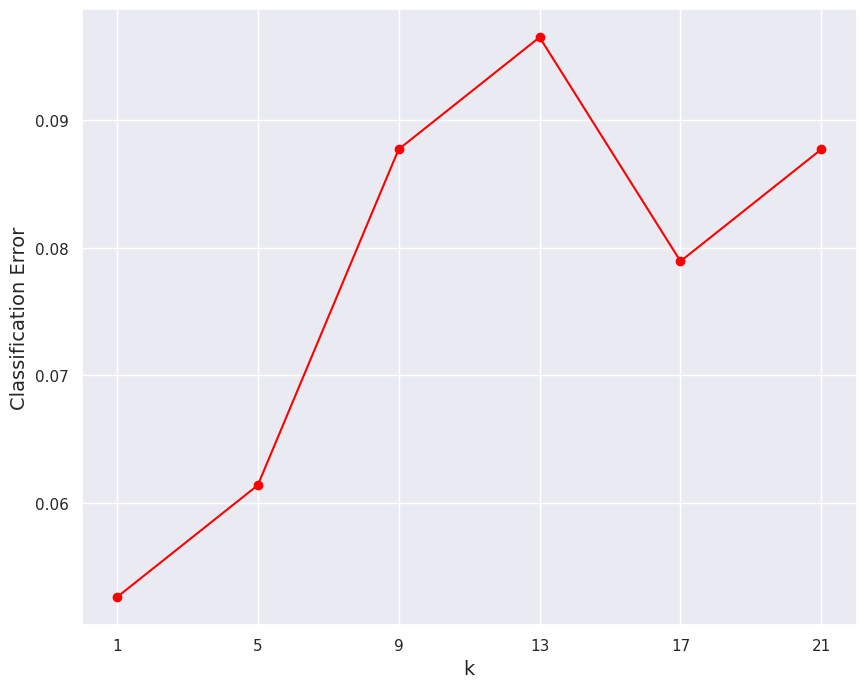

In [67]:
plt.figure(figsize = (10, 8))
plt.plot(possible_k, errors, color = 'red', marker = "o")
plt.xlabel('k', fontsize = 14)
plt.ylabel('Classification Error', fontsize = 14)
plt.xticks(possible_k)
plt.show()

# Conclusion
In this analysis, we utilized the "penguins" dataset to explore the application of the k-nearest neighbors (KNN) algorithm for classification. After visualizing the distribution of penguin species based on bill length and depth, we divided the dataset into training and testing sets. Subsequently, we implemented essential functions for the KNN algorithm, such as calculating nearest neighbors, making predictions, and computing classification errors.